# Topic Modeling

TF-IDF Matrix Shape: (5, 23)

Document-Topic Matrix:
        Topic 1       Topic 2
0  7.560774e-01 -4.340611e-17
1  7.560774e-01  3.777222e-16
2 -1.876166e-16 -9.060896e-16
3 -8.455751e-17  7.549683e-01
4 -6.917260e-16  7.549683e-01

Topic-Term Matrix:
            air          best         brown          cars          cats  \
0 -2.552999e-16  3.461010e-01  2.781918e-01  2.416265e-17 -8.076030e-17   
1  3.070945e-01  3.016862e-16  8.671905e-18  3.070945e-01 -4.071058e-16   

         common    contribute           dog          dogs      electric  ...  \
0 -8.469081e-17  1.630163e-17  5.036755e-01 -8.469081e-17 -3.270171e-16  ...   
1 -4.047430e-16  3.070945e-01  1.207188e-16 -4.047430e-16  3.070945e-01  ...   

      household         jumps          lazy           man          pets  \
0 -8.469081e-17  2.781918e-01  2.781918e-01  3.461010e-01 -8.469081e-17   
1 -4.047430e-16 -5.231265e-17 -5.231265e-17  1.613232e-16 -4.047430e-16   

      pollution         quick        reduce        tru

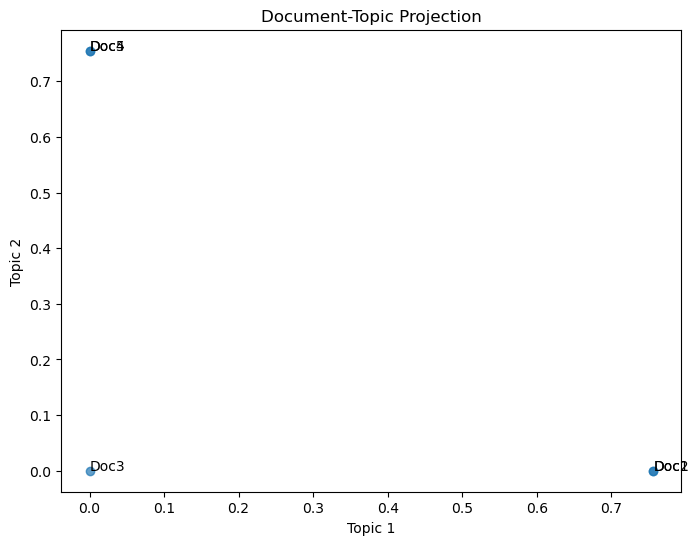

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Sample documents
documents = [
    "The quick brown fox jumps over the lazy dog",
    "A dog is a man's best friend",
    "Cats and dogs are common household pets",
    "Cars and trucks contribute to environmental pollution",
    "Electric vehicles reduce air pollution"
]

# Step 1: Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)  # (documents, terms)

# Step 2: Apply SVD for topic modeling
n_topics = 2  # Number of latent topics
svd = TruncatedSVD(n_components=n_topics, random_state=42)
topic_matrix = svd.fit_transform(tfidf_matrix)

# Document-topic matrix (each row = document, each column = topic weight)
print("\nDocument-Topic Matrix:")
print(pd.DataFrame(topic_matrix, columns=[f"Topic {i+1}" for i in range(n_topics)]))

# Topic-term matrix (each row = topic, each column = term weight)
topic_term_matrix = svd.components_
print("\nTopic-Term Matrix:")
print(pd.DataFrame(topic_term_matrix, columns=vectorizer.get_feature_names_out()))

# Step 3: Interpret topics
def get_top_terms_per_topic(topic_term_matrix, feature_names, n_terms=3):
    topics = []
    for i, topic in enumerate(topic_term_matrix):
        top_terms_idx = topic.argsort()[-n_terms:][::-1]
        top_terms = [feature_names[idx] for idx in top_terms_idx]
        topics.append(top_terms)
    return topics

feature_names = vectorizer.get_feature_names_out()
top_terms = get_top_terms_per_topic(topic_term_matrix, feature_names)
print("\nTop Terms per Topic:")
for i, terms in enumerate(top_terms):
    print(f"Topic {i+1}: {', '.join(terms)}")

# Step 4: Visualize document-topic relationships
plt.figure(figsize=(8, 6))
plt.scatter(topic_matrix[:, 0], topic_matrix[:, 1], alpha=0.7)
for i, txt in enumerate([f"Doc{i+1}" for i in range(len(documents))]):
    plt.annotate(txt, (topic_matrix[i, 0], topic_matrix[i, 1]))
plt.xlabel("Topic 1")
plt.ylabel("Topic 2")
plt.title("Document-Topic Projection")
plt.show()